Importing Necessary Libraries

In [29]:
import pandas as pd
import numpy as num
import matplotlib.pyplot as plt
import csv
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error


## parsing our stock market dataset
stock_dataset = "^DJI.csv"
sp_dataset = "TSLA - Full.csv"
stock_data = pd.read_csv(stock_dataset)
sp_500 = pd.read_csv(sp_dataset)

## removing our null values from the dataset
stock_data = stock_data.dropna()
stock_data = stock_data.dropna(axis=1)
stock_data = stock_data.dropna(how='all')

sp_500 = sp_500.dropna()
sp_500 = sp_500.dropna(axis=1)
sp_500 = sp_500.dropna(how='all')

sp_500

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
1,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500
3,2010-07-07,1.093333,1.108667,0.998667,1.053333,1.053333,103825500
4,2010-07-08,1.076000,1.168000,1.038000,1.164000,1.164000,115671000
...,...,...,...,...,...,...,...
3388,2023-12-15,251.210007,254.130005,248.300003,253.500000,253.500000,135720800
3389,2023-12-18,253.779999,258.739990,251.360001,252.080002,252.080002,116416500
3390,2023-12-19,253.479996,258.339996,253.009995,257.220001,257.220001,106737400
3391,2023-12-20,256.410004,259.839996,247.000000,247.139999,247.139999,125097000


Visualize Stock Market Data for Dow Jones

In [30]:
stock_data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-01-03,36321.589844,36595.820313,36246.449219,36585.058594,36585.058594,347930000
1,2022-01-04,36636.000000,36934.839844,36636.000000,36799.648438,36799.648438,435080000
2,2022-01-05,36722.601563,36952.648438,36400.390625,36407.109375,36407.109375,462040000
3,2022-01-06,36409.050781,36464.191406,36200.679688,36236.468750,36236.468750,385890000
4,2022-01-07,36249.589844,36382.839844,36111.531250,36231.660156,36231.660156,356110000
...,...,...,...,...,...,...,...
521,2024-01-31,38426.781250,38588.859375,38139.660156,38150.300781,38150.300781,453250000
522,2024-02-01,38175.339844,38522.500000,38106.839844,38519.839844,38519.839844,321830000
523,2024-02-02,38448.101563,38783.621094,38336.570313,38654.421875,38654.421875,379760000
524,2024-02-05,38546.769531,38633.878906,38220.398438,38380.121094,38380.121094,322290000


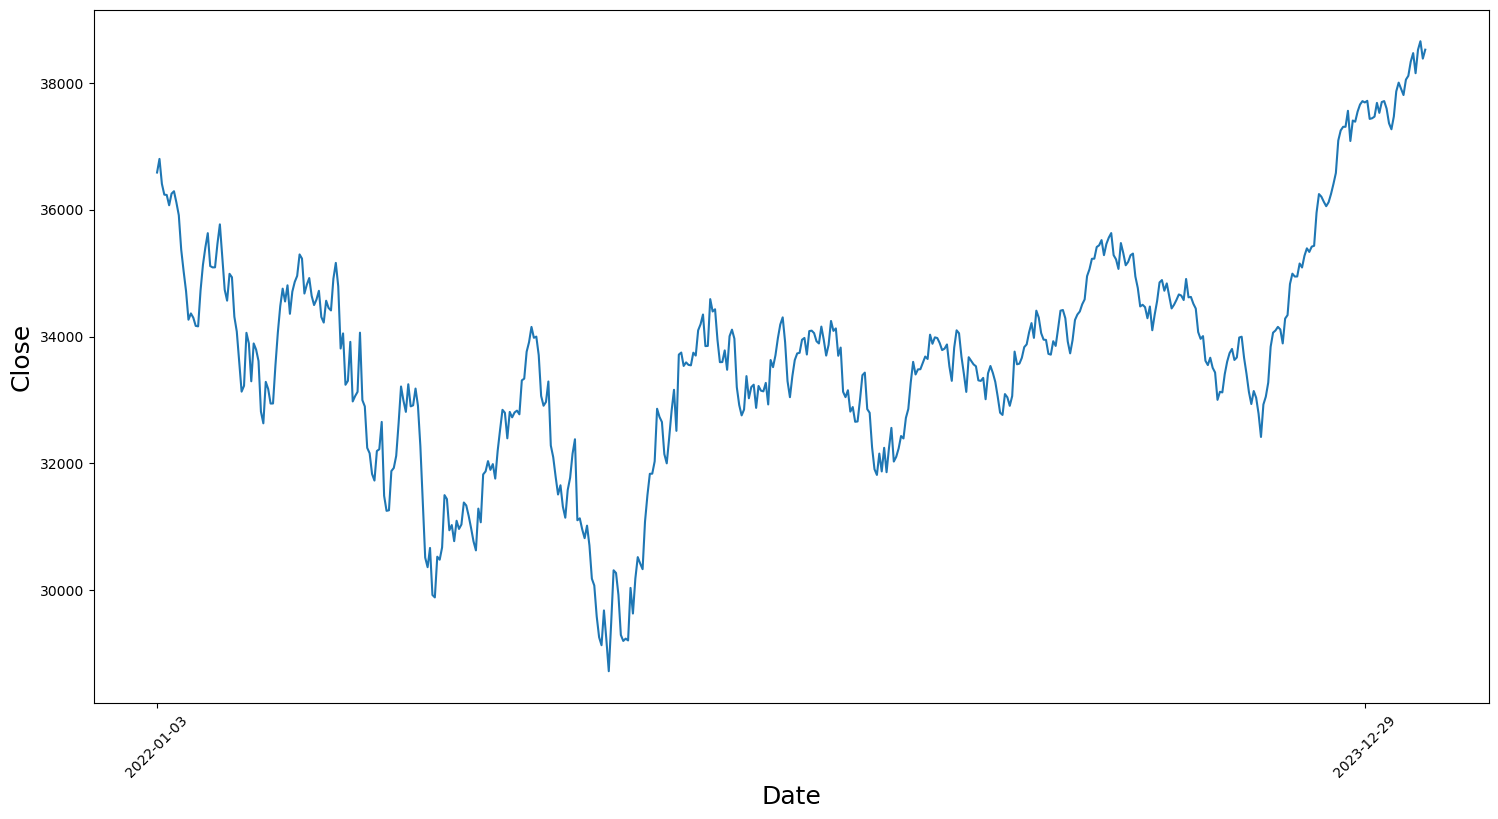

In [31]:
plt.figure(figsize = (18,9))
plt.plot(range(stock_data.shape[0]),stock_data["Close"])
plt.xticks(range(0, stock_data.shape[0],500), stock_data['Date'].loc[::500],rotation=45)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close',fontsize=18)
plt.show()

Creating Machine Learning Target Value to Set Up Logistic Regression Model

In [32]:
stock_data["Tomorrow"] = stock_data["Close"].shift(-1)
stock_data

,Date,Open,High,Low,Close,Adj Close,Volume,Tomorrow
0,2022-01-03,36321.589844,36595.820313,36246.449219,36585.058594,36585.058594,347930000,36799.648438
1,2022-01-04,36636.000000,36934.839844,36636.000000,36799.648438,36799.648438,435080000,36407.109375
2,2022-01-05,36722.601563,36952.648438,36400.390625,36407.109375,36407.109375,462040000,36236.468750
3,2022-01-06,36409.050781,36464.191406,36200.679688,36236.468750,36236.468750,385890000,36231.660156
4,2022-01-07,36249.589844,36382.839844,36111.531250,36231.660156,36231.660156,356110000,36068.871094
...,...,...,...,...,...,...,...,...
521,2024-01-31,38426.781250,38588.859375,38139.660156,38150.300781,38150.300781,453250000,38519.839844
522,2024-02-01,38175.339844,38522.500000,38106.839844,38519.839844,38519.839844,321830000,38654.421875
523,2024-02-02,38448.101563,38783.621094,38336.570313,38654.421875,38654.421875,379760000,38380.121094
524,2024-02-05,38546.769531,38633.878906,38220.398438,38380.121094,38380.121094,322290000,38521.359375


Create and Represent Target Values for Dow Jones Data

In [33]:
stock_data["Target"] = (stock_data["Tomorrow"] > stock_data["Close"]).astype(int)
stock_data

,Date,Open,High,Low,Close,Adj Close,Volume,Tomorrow,Target
0,2022-01-03,36321.589844,36595.820313,36246.449219,36585.058594,36585.058594,347930000,36799.648438,1
1,2022-01-04,36636.000000,36934.839844,36636.000000,36799.648438,36799.648438,435080000,36407.109375,0
2,2022-01-05,36722.601563,36952.648438,36400.390625,36407.109375,36407.109375,462040000,36236.468750,0
3,2022-01-06,36409.050781,36464.191406,36200.679688,36236.468750,36236.468750,385890000,36231.660156,0
4,2022-01-07,36249.589844,36382.839844,36111.531250,36231.660156,36231.660156,356110000,36068.871094,0
...,...,...,...,...,...,...,...,...,...
521,2024-01-31,38426.781250,38588.859375,38139.660156,38150.300781,38150.300781,453250000,38519.839844,1
522,2024-02-01,38175.339844,38522.500000,38106.839844,38519.839844,38519.839844,321830000,38654.421875,1
523,2024-02-02,38448.101563,38783.621094,38336.570313,38654.421875,38654.421875,379760000,38380.121094,0
524,2024-02-05,38546.769531,38633.878906,38220.398438,38380.121094,38380.121094,322290000,38521.359375,1


Create and Represent Target Value for S&P 500 Data


In [34]:
sp_500["Tomorrow"] = sp_500["Close"].shift(-1)
sp_500["Target"] = (sp_500["Tomorrow"] > sp_500["Close"]).astype(int)
sp_500

,Date,Open,High,Low,Close,Adj Close,Volume,Tomorrow,Target
0,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000,1.280000,0
1,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000,1.074000,0
2,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500,1.053333,0
3,2010-07-07,1.093333,1.108667,0.998667,1.053333,1.053333,103825500,1.164000,1
4,2010-07-08,1.076000,1.168000,1.038000,1.164000,1.164000,115671000,1.160000,0
...,...,...,...,...,...,...,...,...,...
3388,2023-12-15,251.210007,254.130005,248.300003,253.500000,253.500000,135720800,252.080002,0
3389,2023-12-18,253.779999,258.739990,251.360001,252.080002,252.080002,116416500,257.220001,1
3390,2023-12-19,253.479996,258.339996,253.009995,257.220001,257.220001,106737400,247.139999,0
3391,2023-12-20,256.410004,259.839996,247.000000,247.139999,247.139999,125097000,254.500000,1


Train Logistic Regression Model on Dow Jones Stock Market Data and Test Model on S&P 500 Data

Mean Squared Error before Cross-Validation:  0.47345132743362833 

Cross-Validation Scores: [0.51917404 0.51917404 0.51994092 0.51846381 0.51846381]
Mean Squared Error after Cross-Validation: 0.5190433240524089 

Train Accuracy: 0.5171650055370985
Test Accuracy: 0.5265486725663717 

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       321
           1       0.53      1.00      0.69       357

    accuracy                           0.53       678
   macro avg       0.26      0.50      0.34       678
weighted avg       0.28      0.53      0.36       678



c:\Users\rijul\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\rijul\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\rijul\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


ValueError: operands could not be broadcast together with shapes (678,) (526,) 

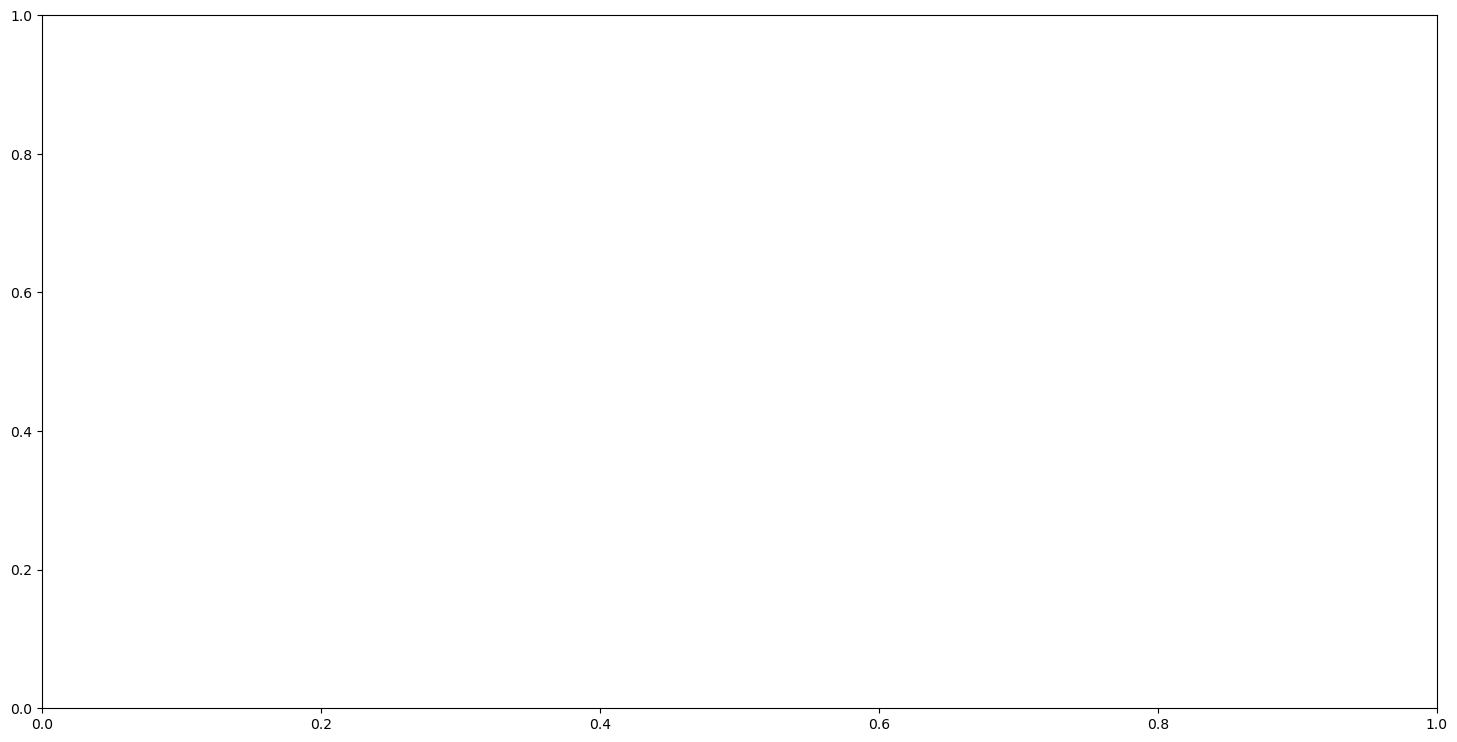

In [35]:
# Create a DataFrame with the original time series and the binary target variable
df = pd.DataFrame({"Close": stock_data["Close"], "Target": stock_data["Target"]})
sp_df = pd.DataFrame({"Close": sp_500["Close"], "Target": sp_500["Target"]})

# Feature Engineering: Adding a 7-day moving average
df['MA7'] = df['Close'].rolling(window=7).mean()
sp_df['MA7'] = sp_df['Close'].rolling(window=7).mean()

# Handling Missing Data: Dropping rows with NaN values
df.dropna(inplace=True)
sp_df.dropna(inplace=True)

# Splitting the data into features (X) and target variable (y)
x = df[['MA7']]
y = df['Target']

sp_X = sp_df[['MA7']]
sp_Y = sp_df['Target']

# Splitting the data into training and testing sets
train_size = int(len(df) * 0.8)  # 80% for training
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.8, shuffle=False)
spX_train, spX_test, spY_train, spY_test = train_test_split(sp_X, sp_Y, test_size=0.2, shuffle=False)


# Creating and training a logistic regression model
model = LogisticRegression(C=0.01) # adjusting C-value to 0.01 to combat overfitting and add regularization
cv_scores = cross_val_score(model, sp_X, sp_Y, scoring='accuracy', cv=5)  # 5-fold cross-validation

# Training the initial model with training data from DJI
model.fit(X_train, y_train)

# Making predictions on the train and test set
spY_train_pred = model.predict(spX_train)
spY_test_pred = model.predict(spX_test)

# Evaluating mean squared error
mse = mean_squared_error(spY_test, spY_test_pred)
print ("Mean Squared Error before Cross-Validation: ", mse, "\n")

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Squared Error after Cross-Validation:", cv_scores.mean(), "\n")

# Evaluating the model performance
train_accuracy = accuracy_score(spY_train, spY_train_pred)
print("Train Accuracy:", train_accuracy)

test_accuracy = accuracy_score(spY_test, spY_test_pred)
print ("Test Accuracy:", test_accuracy, "\n")

# Displaying classification report
print("Classification Report:\n", classification_report(spY_test, spY_test_pred))

# Visualizing the predictions
plt.figure(figsize=(18, 9))
plt.fill_between(range(len(spY_test)), stock_data["Target"][:len(spY_test)], label='Actual Data')
plt.fill_between(range(len(spY_test)), spY_test, color='red', label='Predicted Data')

# Set the date column to represent actual dates
plt.xticks(range(0, len(spY_test), 100), stock_data['Date'].iloc[:len(spY_test):100], rotation=45)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close', fontsize=18)
plt.legend()
plt.show()


